In [1]:
#importing the required datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#importing the data set
adult_income_df = pd.read_csv(r"D:\01_Data\Not Completed\Adult Census Income\income_dataset.csv")

# EDA Part

In [4]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
adult_income_df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adult_income_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
#Replacing "?" with np.nan
adult_income_df[adult_income_df == "?"] = np.nan

D:\Py_Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [10]:
adult_income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
#creating a loop and filling null values with mode value of respective column

for nullValues in ['workclass', 'occupation', 'native.country']:
    adult_income_df[nullValues].fillna(adult_income_df[nullValues].mode()[0], inplace=True)

In [12]:
#Checking for field null values

adult_income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
adult_income_df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [14]:
#replacing <=50K as zero(0) and >50K as one(1)
adult_income_df["income"] = np.where(adult_income_df["income"] == "<=50K", 0, 1)

In [15]:
#Checking for replaced values in the "Income" column
adult_income_df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

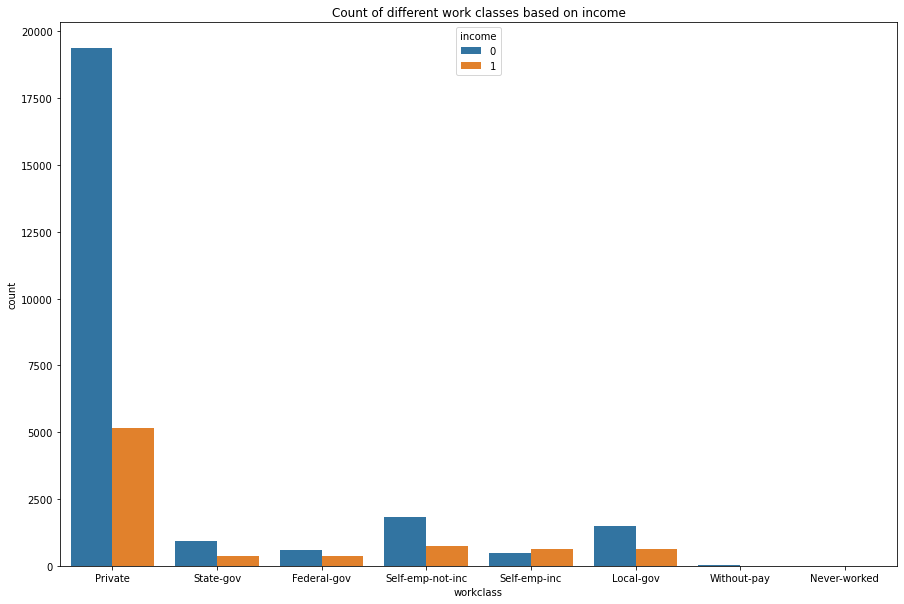

In [21]:
plt.figure(figsize=(15,10))
plt.title("Count of different work classes based on income")
sns.countplot(data=adult_income_df, x='workclass', hue='income')

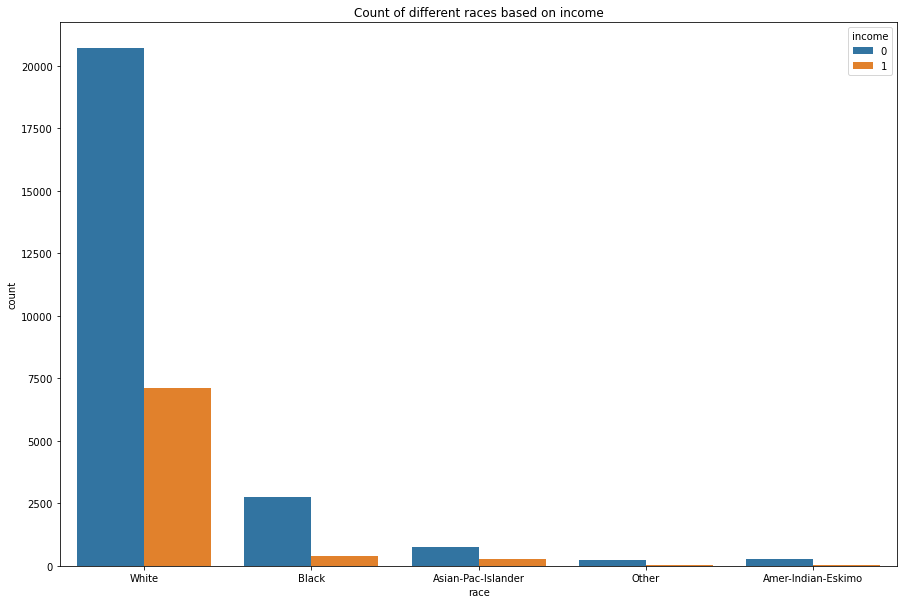

In [31]:
plt.figure(figsize=(15,10))
plt.title('Count of different races based on income')
sns.countplot(data=adult_income_df, x='race', hue='income')

([<matplotlib.patches.Wedge at 0x247a1a99808>,
 [Text(-0.786121386954403, 0.7694239175986707, 'Private'),
  Text(0.31618021024256393, -1.1575966804768267, 'State-gov'),
  Text(0.7201279886327336, -0.8315140888690784, 'Federal-gov'),
  Text(0.9491509941622893, -0.5559787678326737, 'Self-emp-not-inc'),
  Text(1.1474710595255742, -0.35115547489859295, 'Self-emp-inc'),
  Text(1.0948635338694184, -0.10617835091471715, 'Local-gov'),
  Text(1.0999959858569515, -0.002971716438960795, 'Without-pay'),
  Text(1.1999997262892648, -0.0008104971868410202, 'Never-worked')],
 [Text(-0.42879348379331067, 0.4196857732356385, '75.3%'),
  Text(0.18443845597482894, -0.6752647302781488, '7.8%'),
  Text(0.39279708470876373, -0.45355313938313363, '6.4%'),
  Text(0.5177187240885214, -0.30326114609054927, '4.0%'),
  Text(0.6693581180565848, -0.20484069369084584, '3.4%'),
  Text(0.5971982912015009, -0.05791546413530026, '2.9%'),
  Text(0.599997810467428, -0.0016209362394331607, '0.0%'),
  Text(0.6999998403354044

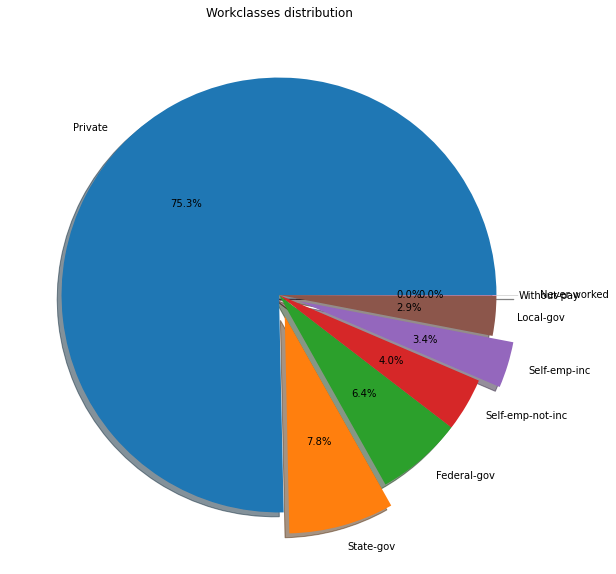

In [46]:
plt.figure(figsize=(20,10))
plt.title('Workclasses distribution')
explode = (0, 0.1, 0, 0, 0.1, 0, 0, 0.1)
labels = adult_income_df['workclass'].unique()
plt.pie(x=adult_income_df['workclass'].value_counts(), explode= explode, labels= labels, autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x247a1d3ab48>,
 [Text(-0.9867232454903924, 0.486186421868101, 'White'),
  Text(0.9806728485083116, -0.6915784584547108, 'Black'),
  Text(1.0752451188481307, -0.23205157701095105, 'Asian-Pac-Islander'),
  Text(1.195938280415925, -0.09864902146397804, 'Other'),
  Text(1.1995898203901745, -0.03137296314135653, 'Amer-Indian-Eskimo')],
 [Text(-0.5382126793583958, 0.2651925937462369, '85.4%'),
  Text(0.5720591616298485, -0.40342076743191463, '9.6%'),
  Text(0.5864973375535257, -0.12657358746051875, '3.2%'),
  Text(0.6976306635759562, -0.05754526252065385, '1.0%'),
  Text(0.6997607285609351, -0.01830089516579131, '0.8%')])

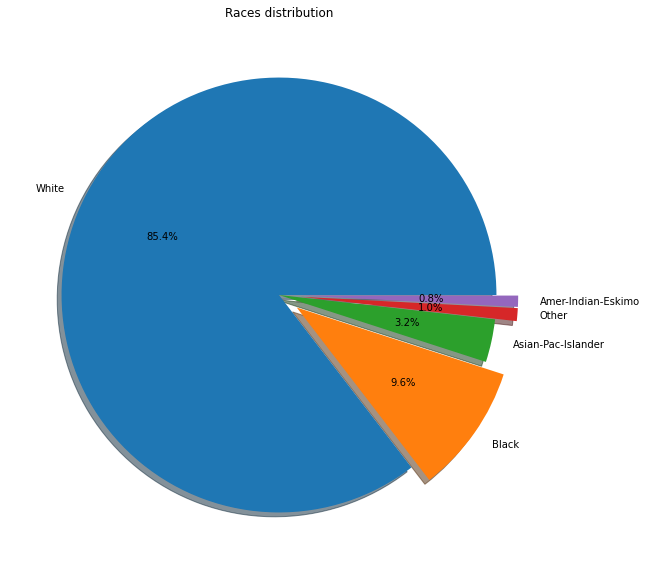

In [48]:
plt.figure(figsize=(20,10))
plt.title('Races distribution')
explode = (0, 0.1, 0, 0.1, 0.1)
labels = adult_income_df['race'].unique()
plt.pie(x=adult_income_df['race'].value_counts(), explode= explode, labels= labels, autopct='%1.1f%%', shadow=True)

# Pre-Processing data set

In [51]:
#creating a loop to replace categorical variables
from sklearn.preprocessing import LabelEncoder
labelEnco = LabelEncoder()

In [52]:
categorical_Variables = ['workclass', 'education', 'marital.status', 'occupation',
               'relationship', 'race', 'sex', 'native.country']

In [54]:
for cat_Variables in categorical_Variables:
        adult_income_df[cat_Variables] = labelEnco.fit_transform(adult_income_df[cat_Variables])

In [55]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [56]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


# Partitioning data set

In [62]:
X_to_scale = adult_income_df.drop(["income"], axis=1)
y = adult_income_df["income"]

In [58]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [60]:
#Scaling the varibales
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [63]:
X_scaled = pd.DataFrame(sc.fit_transform(X_to_scale), columns = X.columns)

In [64]:
X_scaled.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


In [65]:
from sklearn.model_selection import train_test_split

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Model 1. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [72]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred_logReg = logReg.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [75]:
print(confusion_matrix(y_test, y_pred_logReg))

[[6956  428]
 [1293 1092]]


In [76]:
print(classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7384
           1       0.72      0.46      0.56      2385

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [77]:
print("Model one's accuracy score: ", round(accuracy_score(y_test, y_pred_logReg, 2) * 100))

Model one's accuracy score:  82.0


# Model 2: Performing Principal Component Analysis

In [78]:
from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X_scaled)

In [79]:
pca.explained_variance_ratio_

array([0.14783223, 0.10161135, 0.08056461, 0.07870396, 0.07427552,
       0.07329118, 0.07027089, 0.06772609, 0.06487451, 0.06119792,
       0.0608425 , 0.0486531 , 0.04276666, 0.02738948])

Text(0, 0.5, 'Variance Ratio')

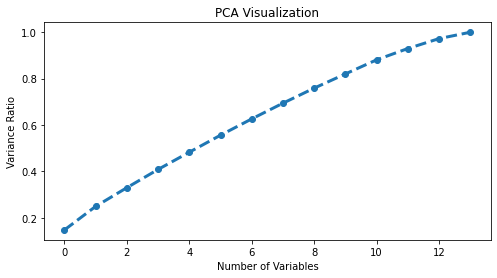

In [80]:
plt.figure(figsize=(8,4))
plt.plot((np.cumsum(pca.explained_variance_ratio_)), linestyle = "--",
        marker= "o", linewidth = 3)
plt.title("PCA Visualization")
plt.xlabel("Number of Variables")
plt.ylabel("Variance Ratio")

In [81]:
#The first 12 variables has 80% of the data
#Creating two Logistic Reg models:
# Model 1: Has all the variables
# Model 2: Has only 12 variables
X_PCA = X_scaled.iloc[:, 0:12]

In [82]:
X_PCA.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss'],
      dtype='object')

In [85]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.3)

In [86]:
logReg2 = LogisticRegression()

In [87]:
logReg2.fit(X_train_PCA, y_train_PCA)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred_logReg2 = logReg2.predict(X_test_PCA)

In [90]:
print(confusion_matrix(y_test_PCA, y_pred_logReg2))

[[7002  401]
 [1355 1011]]


In [91]:
print(classification_report(y_test_PCA, y_pred_logReg2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7403
           1       0.72      0.43      0.54      2366

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769



In [92]:
print("Model two's accuracy score: ", round(accuracy_score(y_test_PCA, y_pred_logReg2, 2) * 100))

Model two's accuracy score:  82.0


# Model 3: Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
y_pred_dTree = dTree.predict(X_test)

In [99]:
print(confusion_matrix(y_test, y_pred_dTree))

[[6446  992]
 [ 899 1432]]


In [100]:
print(classification_report(y_test, y_pred_dTree))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7438
           1       0.59      0.61      0.60      2331

    accuracy                           0.81      9769
   macro avg       0.73      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [101]:
print("Model three's accuracy score: ", round(accuracy_score(y_test, y_pred_dTree, 2) * 100))

Model three's accuracy score:  81.0


# Conclusion

## Both logistic regression and decision tree classifier worked well with this data set